In [43]:
colab = False

if colab:
    from google.colab import drive
    drive.mount('/content/gdrive')
    !git clone https://github.com/deepmind/pycolab.git
    !git clone https://github.com/nicoladainese96/RelationalDeepRL.git
    !pip install pycolab

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import torch
if colab: 
    import sys
    sys.path.insert(0, 'RelationalDeepRL')

from RelationalModule import ActorCritic, ControlActorCritic
from Utils import train_agent_sandbox as train
from Utils import test_env
from importlib import reload

In [45]:
def random_start(X=10, Y=10):
    s1, s2 = np.random.choice(X*Y, 2, replace=False)
    initial = [s1//X, s1%X]
    goal = [s2//X, s2%X]
    return initial, goal

In [46]:
# Variable parameters
X = 10
Y = 10
initial, goal = random_start(X, Y)

# All game parameters
game_params = dict(x=X, y=Y, initial=initial, goal=goal, max_steps=100, greyscale_state=True)

In [47]:
HPs = dict(action_space=4, lr=0.0003, gamma=0.99, TD=True, twin=True, tau=0.01, n_steps=1,
           actor_lr=0.00003, critic_lr=0.0003, H=1.,
           n_kernels=96, vocab_size = 117, n_dim=12, n_features=64, n_heads=4, n_attn_modules=2, 
           n_linears=4, max_pool=True, linear_size=X)
if colab:
    HPs['device'] = 'cuda'
else:
    HPs['device'] = 'cpu'
    
# Relational Agent
agent = ActorCritic.BoxWorldA2C(**HPs)

In [48]:
reload(train)

<module 'Utils.train_agent_sandbox' from '/home/nicola/Nicola_unipd/MasterThesis/RelationalDeepRL/Utils/train_agent_sandbox.py'>

In [49]:
env = test_env.Sandbox(**game_params)
rewards, log_probs, distributions, states, done, bootstrap = train.play_episode(agent, env, max_steps=100)

In [50]:
print("rewards: ", rewards.shape)
print("log_probs: ", len(log_probs))
print("distributions: ", len(distributions))
print("states: ", states.shape)
print("done: ", done.shape)
print("bootstrap: ", bootstrap.shape)

rewards:  (100,)
log_probs:  100
distributions:  100
states:  (101, 1, 10, 10)
done:  (100,)
bootstrap:  (100,)


In [51]:
print("rewards: \n", rewards)
print("log_probs: \n", log_probs)
print("distributions: \n", distributions)
print("states: \n", states)
print("done: \n", done)
print("bootstrap: \n", bootstrap)

rewards: 
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1
  0  0  0  0  0  0  0 -1 -1  0 -1  0 -1 -1  0 -1 -1 -1  0 -1  0 -1  0  0
  0  0  0 -1  0  0  0 -1  0 -1  0 -1  0  0 -1 -1 -1  0  0  0  0 -1 -1  0
  0 -1 -1 -1 -1 -1 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
log_probs: 
 [tensor(-0.5441, grad_fn=<SelectBackward>), tensor(-0.5101, grad_fn=<SelectBackward>), tensor(-0.6681, grad_fn=<SelectBackward>), tensor(-0.4828, grad_fn=<SelectBackward>), tensor(-1.8532, grad_fn=<SelectBackward>), tensor(-0.6977, grad_fn=<SelectBackward>), tensor(-3.4933, grad_fn=<SelectBackward>), tensor(-0.7403, grad_fn=<SelectBackward>), tensor(-1.2008, grad_fn=<SelectBackward>), tensor(-0.7542, grad_fn=<SelectBackward>), tensor(-0.5917, grad_fn=<SelectBackward>), tensor(-1.2255, grad_fn=<SelectBackward>), tensor(-1.8824, grad_fn=<SelectBackward>), tensor(-0.6767, grad_fn=<SelectBackward>), tensor(-1.8752, grad_fn=<SelectBackward>), tensor(-0.4684, grad_fn=

In [52]:
distr = torch.stack(distributions, axis=1)

In [53]:
entropy = torch.mean(distr*torch.log(distr))
entropy

tensor(-0.2639, grad_fn=<MeanBackward0>)

In [54]:
mask = (distr == 0).nonzero()
distr[:,mask] = 1e-5
distr

tensor([[[0.1350, 0.5803, 0.2648, 0.0198],
         [0.1297, 0.6004, 0.2347, 0.0353],
         [0.1393, 0.5127, 0.3227, 0.0253],
         [0.1412, 0.6170, 0.2121, 0.0297],
         [0.1567, 0.4864, 0.3265, 0.0303],
         [0.1772, 0.4977, 0.2934, 0.0317],
         [0.1768, 0.5571, 0.2357, 0.0304],
         [0.1459, 0.4770, 0.3438, 0.0334],
         [0.1013, 0.5769, 0.3010, 0.0208],
         [0.1230, 0.4704, 0.3830, 0.0236],
         [0.1618, 0.5534, 0.2477, 0.0371],
         [0.1066, 0.5583, 0.2936, 0.0415],
         [0.1522, 0.4742, 0.3512, 0.0224],
         [0.1269, 0.5083, 0.3426, 0.0222],
         [0.1533, 0.5486, 0.2696, 0.0285],
         [0.1094, 0.6260, 0.2445, 0.0202],
         [0.1637, 0.5065, 0.2972, 0.0326],
         [0.1057, 0.5998, 0.2604, 0.0341],
         [0.1126, 0.6585, 0.1891, 0.0399],
         [0.1694, 0.5024, 0.3035, 0.0247],
         [0.1282, 0.5701, 0.2861, 0.0156],
         [0.0693, 0.5785, 0.3310, 0.0212],
         [0.1217, 0.6642, 0.1870, 0.0271],
         [0

Variables log_probs and distributions have a gradient attached, as it should be. Distributions is used only if the entropy regularization is active.

In [55]:
agent.update(rewards, log_probs, distributions, states, done, bootstrap)

(1.2456992864608765, -0.339316725730896, -0.2638885974884033)

# Training cycle

In [11]:
reload(train)

<module 'Utils.train_agent_sandbox' from '/home/nicola/Nicola_unipd/MasterThesis/RelationalDeepRL/Utils/train_agent_sandbox.py'>

In [12]:
results = train.train_sandbox(agent, game_params, n_episodes = 100, max_steps=100, return_agent=True)

Episode 10 - reward: -10.90
Episode 20 - reward: -4.70
Episode 30 - reward: -4.50
Episode 40 - reward: -4.40
Episode 50 - reward: -4.40
Episode 60 - reward: -6.70
Episode 70 - reward: -2.60
Episode 80 - reward: -7.00
Episode 90 - reward: -2.40
Episode 100 - reward: -3.70


In [16]:
score, asymptotic_score, asymptotic_std, trained_agent, time_profile, losses = results

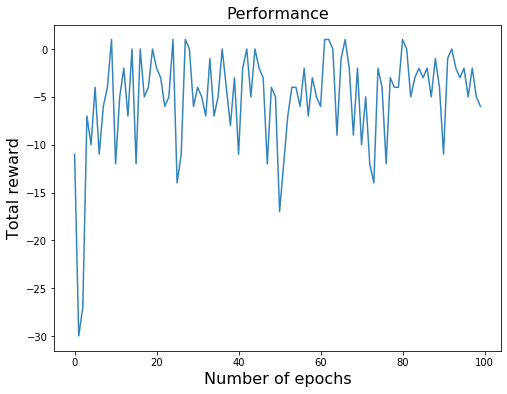

In [17]:
plt.figure(figsize=(8,6))
n_epochs = np.arange(len(score))
plt.plot(n_epochs, score, alpha=0.9)
plt.title("Performance", fontsize=16)
plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("Total reward", fontsize=16)
plt.show()

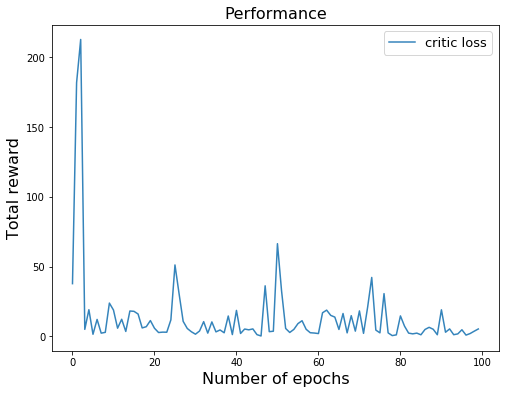

In [23]:
plt.figure(figsize=(8,6))
n_epochs = np.arange(len(score))
plt.plot(n_epochs, losses['critic_losses'], alpha=0.9, label='critic loss')
plt.title("Performance", fontsize=16)
plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("Total reward", fontsize=16)
plt.legend(fontsize=13)
plt.show()

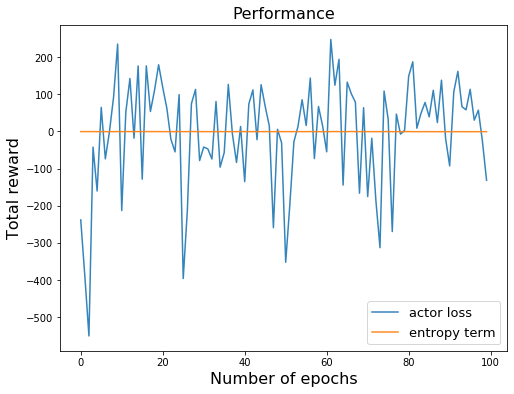

In [35]:
plt.figure(figsize=(8,6))
n_epochs = np.arange(len(score))
plt.plot(n_epochs, losses['actor_losses'], alpha=0.9, label='actor loss')
plt.plot(n_epochs, np.array(losses['entropies']), alpha=0.9, label='entropy term')
plt.title("Performance", fontsize=16)
plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("Total reward", fontsize=16)
plt.legend(fontsize=13)
plt.show()

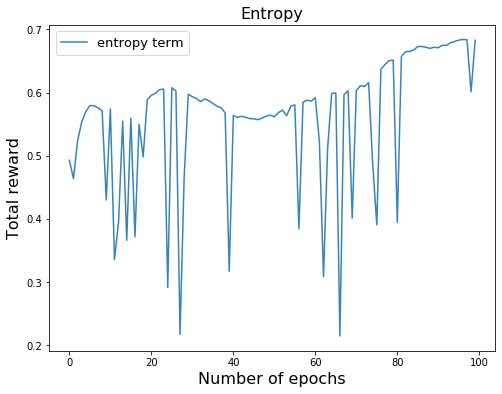

In [25]:
plt.figure(figsize=(8,6))
n_epochs = np.arange(len(score))
#plt.plot(n_epochs, losses['actor_losses'], alpha=0.9, label='actor loss')
plt.plot(n_epochs, -np.array(losses['entropies']), alpha=0.9, label='entropy term')
plt.title("Entropy", fontsize=16)
plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("Total reward", fontsize=16)
plt.legend(fontsize=13)
plt.show()

**How to read and interpret:** Entropy is higher for policies that are highly stochastic and zero for those that are deterministic. The spikes toward smaller entropies are probably due to strong feedbacks (either positive or negative ones). If we have |A| possible actions, the maximum value of the entropy is:
$$S = \sum_{a=1}^4 - \frac{1}{|A|}log\left( \frac{1}{|A|} \right) = - log\left( \frac{1}{|A|} \right) = +log(|A|) \approx 1.4 $$
Given that the actor updates have order of the hundred, we should use a coupling constant much higher that the one currently used $(10^{-2})$. The other problem is that scaling the reward would leave the entropy unchanged, thus if the actor loss changes of many orders of magnitude during training, we must be aware that entropy regularization might become a real problem.

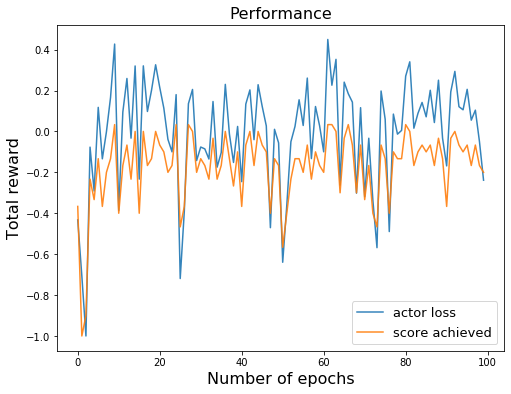

In [31]:
plt.figure(figsize=(8,6))
n_epochs = np.arange(len(score))
norm_actor_losses = np.array(losses['actor_losses'])/max(abs(np.array(losses['actor_losses'])))
plt.plot(n_epochs, norm_actor_losses, alpha=0.9, label='actor loss')
plt.plot(n_epochs, score/max(abs(score)), alpha=0.9, label='score achieved')
plt.title("Performance", fontsize=16)
plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("Total reward", fontsize=16)
plt.legend(fontsize=13)
plt.show()

Rescaling a bit both the actor loss and the score, we can see that they are strongly correlated and this is due to the high number of steps considered by the n-steps actor critic. As we can see both here and in the entropy term, it seems that the update on the actor is too strong.

# Scripted critic

In [28]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F 
from torch.distributions import Categorical

from RelationalModule.AC_networks import BoxWorldCritic #custom module

debug = False 

class CriticAgentTD():
    """
    Advantage Actor-Critic RL agent for BoxWorld environment described in the paper
    Relational Deep Reinforcement Learning.
    
    Notes
    -----
    * Always uses 2 separate networks for the critic,one that learns from new experience 
      (student/critic) and the other one (critic_target/teacher)that is more conservative 
      and whose weights are updated through an exponential moving average of the weights 
      of the critic, i.e.
          target.params = (1-tau)*target.params + tau* critic.params
    * In the case of Monte Carlo estimation the critic_target is never used
    * Possible to use twin networks for the critic and the critic target for improved 
      stability. Critic target is used for updates of both the actor and the critic and
      its output is the minimum between the predictions of its two internal networks.
      
    """ 
    
    def __init__(self, lr, gamma, TD=True, twin=False, tau = 1., 
                 H=1e-2, n_steps = 1, device='cpu', **box_net_args):
        
        self.gamma = gamma
        self.lr = lr
        
        self.TD = TD
        self.twin = twin 
        self.tau = tau
        self.H = H
        self.n_steps = n_steps
        
        self.critic = BoxWorldCritic(twin, **box_net_args)
        
        if self.TD:
            self.critic_trg = BoxWorldCritic(twin, target=True, **box_net_args)

            # Init critic target identical to critic
            for trg_params, params in zip(self.critic_trg.parameters(), self.critic.parameters()):
                trg_params.data.copy_(params.data)
            
        self.critic_optim = torch.optim.Adam(self.critic.parameters(), lr=lr)
        
        self.device = device 
        self.critic.to(self.device)
        if self.TD:
            self.critic_trg.to(self.device)
        
        if debug:
            print("="*10 +" A2C HyperParameters "+"="*10)
            print("Discount factor: ", self.gamma)
            print("Learning rate: ", self.lr)
            print("Temporal Difference learning: ", self.TD)
            print("Twin networks: ", self.twin)
            print("Update critic target factor: ", self.tau)
            if self.TD:
                print("n_steps for TD: ", self.n_steps)
            print("Device used: ", self.device)
            print("\n\n"+"="*10 +" A2C Architecture "+"="*10)
            print("Critic architecture: \n",self.critic)
            print("Critic target architecture: ")
            if self.TD:
                print(self.critic_trg)
            else:
                print("Not used")
    
    def update_TD(self, rewards, states, done, bootstrap=None):   
        
        ### Compute n-steps rewards, states, discount factors and done mask ###
        
        n_step_rewards = self.compute_n_step_rewards(rewards)
        if debug:
            print("n_step_rewards.shape: ", n_step_rewards.shape)
            print("rewards.shape: ", rewards.shape)
            print("n_step_rewards: ", n_step_rewards)
            print("rewards: ", rewards)
            print("bootstrap: ", bootstrap)
                
        if bootstrap is not None:
            done[bootstrap] = False 
        if debug:
            print("done.shape: (before n_steps)", done.shape)
            print("done: (before n_steps)", done)
        
        old_states = torch.tensor(states[:-1].astype(int)).to(self.device)

        new_states, Gamma_V, done = self.compute_n_step_states(states, done)
        new_states = torch.tensor(new_states.astype(int)).to(self.device)

        if debug:
            print("done.shape: (after n_steps)", done.shape)
            print("Gamma_V.shape: ", Gamma_V.shape)
            print("done: (after n_steps)", done)
            print("Gamma_V: ", Gamma_V)
            print("old_states.shape: ", old_states.shape)
            print("new_states.shape: ", new_states.shape)
            
        ### Wrap variables into tensors ###
        
        done = torch.LongTensor(done.astype(int)).to(self.device)
    
        n_step_rewards = torch.tensor(n_step_rewards).float().to(self.device)
        Gamma_V = torch.tensor(Gamma_V).float().to(self.device)
        
        ### Update critic and then actor ###
        critic_loss = self.update_critic_TD(n_step_rewards, new_states, old_states, done, Gamma_V)
        #actor_loss, entropy = self.update_actor_TD(n_step_rewards, log_probs, distributions, new_states, old_states, done, Gamma_V)
        
        return critic_loss#, actor_loss, entropy
    
    def update_critic_TD(self, n_step_rewards, new_states, old_states, done, Gamma_V):
        
        # Compute loss 
        if debug: print("Updating critic...")
        with torch.no_grad():
            V_trg = self.critic_trg(new_states).squeeze()
            if debug:
                print("V_trg.shape (after critic): ", V_trg.shape)
            V_trg = (1-done)*Gamma_V*V_trg + n_step_rewards
            if debug:
                print("V_trg.shape (after sum): ", V_trg.shape)
            V_trg = V_trg.squeeze()
            if debug:
                print("V_trg.shape (after squeeze): ", V_trg.shape)
                print("V_trg.shape (after squeeze): ", V_trg)
            
        if self.twin:
            V1, V2 = self.critic(old_states)
            if debug:
                print("V1.shape: ", V1.squeeze().shape)
                print("V1: ", V1)
            loss1 = 0.5*F.mse_loss(V1.squeeze(), V_trg)
            loss2 = 0.5*F.mse_loss(V2.squeeze(), V_trg)
            loss = loss1 + loss2
        else:
            V = self.critic(old_states).squeeze()
            if debug: 
                print("V.shape: ",  V.shape)
                print("V: ",  V)
            loss = F.mse_loss(V, V_trg)
        
        # Backpropagate and update
        
        self.critic_optim.zero_grad()
        loss.backward()
        self.critic_optim.step()
        
        # Update critic_target: (1-tau)*old + tau*new
        
        for trg_params, params in zip(self.critic_trg.parameters(), self.critic.parameters()):
                trg_params.data.copy_((1.-self.tau)*trg_params.data + self.tau*params.data)
        
        return loss.item()
    
    def compute_n_step_rewards(self, rewards):
        """
        Computes n-steps discounted reward padding with zeros the last elements of the trajectory.
        This means that the rewards considered are AT MOST n, but can be less for the last n-1 elements.
        """
        T = len(rewards)
        
        # concatenate n_steps zeros to the rewards -> they do not change the cumsum
        r = np.concatenate((rewards,[0 for _ in range(self.n_steps)])) 
        
        Gamma = np.array([self.gamma**i for i in range(r.shape[0])])
        
        # reverse everything to use cumsum in right order, then reverse again
        Gt = np.cumsum(r[::-1]*Gamma[::-1])[::-1]
        
        G_nstep = Gt[:T] - Gt[self.n_steps:] # compute n-steps discounted return
        
        Gamma = Gamma[:T]
        
        assert len(G_nstep) == T, "Something went wrong computing n-steps reward"
        
        n_steps_r = G_nstep / Gamma
        
        return n_steps_r
    
    def compute_n_step_states(self, states, done):
        """
        Computes n-steps target states (to be used by the critic as target values together with the
        n-steps discounted reward). For last n-1 elements the target state is the last one available.
        Adjusts also the `done` mask used for disabling the bootstrapping in the case of terminal states
        and returns Gamma_V, that are the discount factors for the target state-values, since they are 
        n-steps away (except for the last n-1 states, whose discount is adjusted accordingly).
        
        Return
        ------
        new_states, Gamma_V, done: arrays with first dimension = len(states)-1
        """
        
        # Compute indexes for (at most) n-step away states 
        
        n_step_idx = np.arange(len(states)-1) + self.n_steps
        diff = n_step_idx - len(states) + 1
        mask = (diff > 0)
        n_step_idx[mask] = len(states) - 1
        
        # Compute new states
        
        new_states = states[n_step_idx]
        
        # Compute discount factors
        
        pw = np.array([self.n_steps for _ in range(len(new_states))])
        pw[mask] = self.n_steps - diff[mask]
        Gamma_V = self.gamma**pw
        
        # Adjust done mask
        
        mask = (diff >= 0)
        done[mask] = done[-1]
        
        return new_states, Gamma_V, done


In [29]:
def play_optimal(env):
    state = env.reset(random_init = True)
    
    rewards = []
    done = []
    states = [state]
    bootstrap = []
    
    while True:
        action = env.get_optimal_action()
        
        new_state, reward, terminal, info = env.step(action) 
        states.append(new_state)
        rewards.append(reward)
        done.append(terminal)
        
        if terminal is True and 'TimeLimit.truncated' in info:
            bootstrap.append(True)
        else:
            bootstrap.append(False) 
            
        if terminal:
            break
            
        state = new_state
    
    return np.array(rewards), np.array(states), np.array(done), np.array(bootstrap)

In [33]:
def train_critic_TD(HPs, n_episodes = 100):
    
    # Create environment
    env = test_env.Sandbox(10, 10, [0,0], [9,9], max_steps=50)
    
    critic = CriticAgentTD(**HPs)
    
    losses = []
    for e in range(n_episodes):
        rewards, states, done, bootstrap = play_optimal(env)
        
        loss = critic.update_TD(rewards, states, done, bootstrap)
        losses.append(loss)
        
        if (e+1)%10 == 0:
            print("Episode %d - loss: %.4f"%(e+1, np.mean(losses[-10:])))

    return critic, losses

In [34]:
HPs = dict( lr=0.0003, gamma=0.99, TD=True, twin=True, tau=0.01, n_steps=40, n_kernels=96, 
           vocab_size = 117, n_dim=12, n_features=64, n_heads=4, n_attn_modules=2, 
           n_linears=4, max_pool=True, linear_size=10)

In [36]:
critic, losses = train_critic_TD(HPs, 1000)

Episode 10 - loss: 0.6544
Episode 20 - loss: 0.1188
Episode 30 - loss: 0.0467
Episode 40 - loss: 0.0182
Episode 50 - loss: 0.0183
Episode 60 - loss: 0.0167
Episode 70 - loss: 0.0113
Episode 80 - loss: 0.0120
Episode 90 - loss: 0.0157
Episode 100 - loss: 0.0140
Episode 110 - loss: 0.0109
Episode 120 - loss: 0.0102
Episode 130 - loss: 0.0092
Episode 140 - loss: 0.0092
Episode 150 - loss: 0.0087
Episode 160 - loss: 0.0074
Episode 170 - loss: 0.0077
Episode 180 - loss: 0.0079
Episode 190 - loss: 0.0065
Episode 200 - loss: 0.0070
Episode 210 - loss: 0.0084
Episode 220 - loss: 0.0059
Episode 230 - loss: 0.0046
Episode 240 - loss: 0.0057
Episode 250 - loss: 0.0075
Episode 260 - loss: 0.0058
Episode 270 - loss: 0.0065
Episode 280 - loss: 0.0051
Episode 290 - loss: 0.0050
Episode 300 - loss: 0.0043
Episode 310 - loss: 0.0046
Episode 320 - loss: 0.0038
Episode 330 - loss: 0.0034
Episode 340 - loss: 0.0048
Episode 350 - loss: 0.0048
Episode 360 - loss: 0.0043
Episode 370 - loss: 0.0048
Episode 38

In [37]:
def plot_loss(losses, x='', y='', t='', xlog=False, ylog=False):
    episodes = np.arange(len(losses)) + 1
    plt.figure(figsize=(8,6))
    plt.plot(episodes, losses)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.title(t, fontsize=16)
    if xlog:
        plt.xscale('log')
    if ylog:
        plt.yscale('log')

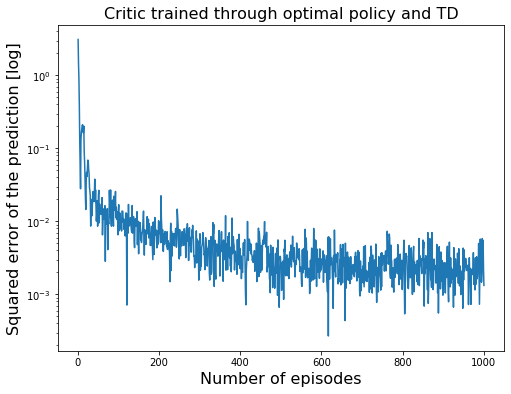

In [39]:
x = "Number of episodes"
y = "Squared error of the prediction [log]"
t = "Critic trained through optimal policy and TD"
plot_loss(losses, x, y, t, ylog=True)

# Scripted critic

In [66]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F 
from torch.distributions import Categorical

from RelationalModule.AC_networks import BoxWorldActor

debug = False

class ActorAgentTD():
    """
    Advantage Actor-Critic RL agent for BoxWorld environment described in the paper
    Relational Deep Reinforcement Learning.
    
    Notes
    -----
    * Always uses 2 separate networks for the critic,one that learns from new experience 
      (student/critic) and the other one (critic_target/teacher)that is more conservative 
      and whose weights are updated through an exponential moving average of the weights 
      of the critic, i.e.
          target.params = (1-tau)*target.params + tau* critic.params
    * In the case of Monte Carlo estimation the critic_target is never used
    * Possible to use twin networks for the critic and the critic target for improved 
      stability. Critic target is used for updates of both the actor and the critic and
      its output is the minimum between the predictions of its two internal networks.
      
    """ 
    
    def __init__(self, action_space, lr, gamma, TD=True, twin=False, tau = 1., 
                 H=1e-2, n_steps = 1, device='cpu', **box_net_args):
        """
        Parameters
        ----------
        action_space: int
            Number of (discrete) possible actions to take
        lr: float in [0,1]
            Learning rate
        gamma: float in [0,1]
            Discount factor
        TD: bool (default=True)
            If True, uses Temporal Difference for the critic's estimates
            Otherwise uses Monte Carlo estimation
        twin: bool (default=False)
            Enables twin networks both for critic and critic_target
        tau: float in [0,1] (default = 1.)
            Regulates how fast the critic_target gets updates, i.e. what percentage of the weights
            inherits from the critic. If tau=1., critic and critic_target are identical 
            at every step, if tau=0. critic_target is unchangable. 
            As a default this feature is disabled setting tau = 1, but if one wants to use it a good
            empirical value is 0.005.
        H: float (default 1e-2)
            Entropy multiplicative factor in actor's loss
        n_steps: int (default=1)
            Number of steps considered in TD update
        device: str in {'cpu','cuda'}
            Select if training agent with cpu or gpu. 
            FIXME: At the moment is gpu is present, it MUST use the gpu.
        **box_net_args: dict (optional)
            Dictionary of {'key':value} pairs valid for BoxWorldNet.
            Valid keys:
                in_channels: int (default 3)
                    Number of channels of the input image (e.g. 3 for RGB)
                n_kernels: int (default 24)
                    Number of features extracted for each pixel
                vocab_size: int (default 116)
                    Range of integer values of the raw pixels
                n_dim: int (default 3)
                    Embedding dimension for each pixel channel (1 channel for greyscale, 
                    3 for RGB)
                n_features: int (default 256)
                    Number of linearly projected features after positional encoding.
                    This is the number of features used during the Multi-Headed Attention
                    (MHA) blocks
                n_heads: int (default 4)
                    Number of heades in each MHA block
                n_attn_modules: int (default 2)
                    Number of MHA blocks
                n_linears: int (default 4)
                    Number of fully-connected layers after the FeaturewiseMaxPool layer
        """
        
        self.gamma = gamma
        self.lr = lr
        
        self.n_actions = action_space
        self.TD = TD
        self.twin = twin 
        self.tau = tau
        self.H = H
        self.n_steps = n_steps
        
        self.actor = BoxWorldActor(action_space, **box_net_args)
       

        self.actor_optim = torch.optim.Adam(self.actor.parameters(), lr=lr)
            
     
        self.device = device 
        self.actor.to(self.device) 
        
    def get_action(self, state, return_log=False):
        log_probs = self.forward(state)
        dist = torch.exp(log_probs)
        probs = Categorical(dist)
        action =  probs.sample().item()
        if return_log:
            return action, log_probs.view(-1)[action], dist
        else:
            return action
    
    def forward(self, state):
        """
        Makes a tensor out of a numpy array state and then forward
        it with the actor network.
        
        Parameters
        ----------
        state: array of int
            Shape (episode_len, in_channels, lin_size, lin_size)
            Or    (in_channels, lin_size, lin_size)
        """
        state = torch.from_numpy(state.astype(int)).to(self.device)
        log_probs = self.actor(state)
        return log_probs
    
    def critic(self, state, env):
        """Implements optimal critic given the sandbox environment."""
        AGENT_COLOR = 46
        distances = []
        for s in state:
            #print("s: ", s)
            shape = s.shape
            #print("shape: ", shape)
            s = s.numpy().reshape(shape[1], shape[2])
            x, y = np.where(s==AGENT_COLOR)
            #print("x and y: ", x, y)
            s_decoded = [x, y]
            #print("s_decoded: ", s_decoded)
            #print("\n\tState %d decoded in (%d, %d)"%(s, s_decoded[0], s_decoded[1]))
            d = env.dist_to_goal(s_decoded)
            #print("\tGoal in (%d,%d)"%(env.goal[0], env.goal[1]))
            #print("\tDistance from goal: ", d)
            distances.append(d)
        distances = np.array(distances) -1
        #print("distances.shape: ", distances.shape)
        #print("Distances: ", distances)
        #print("gamma*dist: ", (self.gamma**distances).shape)
        values = torch.tensor(self.gamma**distances).float()
        
        #print("Values: ", values,'\n')
        return values
    
    def update_TD(self, env, rewards, log_probs, distributions, states, done, bootstrap=None):   
        
        ### Compute n-steps rewards, states, discount factors and done mask ###
        
        n_step_rewards = self.compute_n_step_rewards(rewards)
        if debug:
            print("n_step_rewards.shape: ", n_step_rewards.shape)
            print("rewards.shape: ", rewards.shape)
            print("n_step_rewards: ", n_step_rewards)
            print("rewards: ", rewards)
            #print("bootstrap: ", bootstrap)
                
        if bootstrap is not None:
            done[bootstrap] = False 
        #if debug:
            #print("done.shape: (before n_steps)", done.shape)
            #print("done: (before n_steps)", done)
        
        old_states = torch.tensor(states[:-1].astype(int)).to(self.device)

        new_states, Gamma_V, done = self.compute_n_step_states(states, done)
        new_states = torch.tensor(new_states.astype(int)).to(self.device)

        if debug:
            print("done.shape: (after n_steps)", done.shape)
            print("Gamma_V.shape: ", Gamma_V.shape)
            print("done: (after n_steps)", done)
            print("Gamma_V: ", Gamma_V)
            print("old_states.shape: ", old_states.shape)
            print("new_states.shape: ", new_states.shape)
            
        ### Wrap variables into tensors ###
        
        done = torch.LongTensor(done.astype(int)).to(self.device)
        #if debug: print("log_probs: ", log_probs)
        log_probs = torch.stack(log_probs).to(self.device)
        #if debug: print("log_probs: ", log_probs)
        distributions = torch.stack(distributions, axis=1).to(self.device)
        # Regularize terms with 0 probability (if that happens)
        mask = (distributions == 0).nonzero()
        distributions[:,mask] = 1e-5
        
        n_step_rewards = torch.tensor(n_step_rewards).float().to(self.device)
        Gamma_V = torch.tensor(Gamma_V).float().to(self.device)
        
        ### Update critic and then actor ###
        #critic_loss = self.update_critic_TD(n_step_rewards, new_states, old_states, done, Gamma_V)
        actor_loss = self.update_actor_TD(env, n_step_rewards, log_probs, distributions, new_states, old_states, done, Gamma_V)
        
        return actor_loss
    

    def update_actor_TD(self, env, n_step_rewards, log_probs, distributions, new_states, old_states, done, Gamma_V):
        
        # Compute gradient 
        if debug: print("Updating actor...")
        with torch.no_grad():
            V_pred = self.critic(old_states, env).squeeze()
            V_trg = self.critic(new_states, env).squeeze()
            V_trg = (1-done)*Gamma_V*V_trg + n_step_rewards
            
        A = V_trg - V_pred
        policy_gradient = - log_probs*A
        if debug:
            print("V_trg.shape: ",V_trg.shape)
            print("V_trg: ", V_trg)
            print("V_pred.shape: ",V_pred.shape)
            print("V_pred: ", V_pred)
            print("A.shape: ", A.shape)
            print("A: ", A)
            print("policy_gradient.shape: ", policy_gradient.shape)
            print("policy_gradient: ", policy_gradient)
        policy_grad = torch.mean(policy_gradient)
        if debug: print("policy_grad: ", policy_grad)
        entropy = self.H*torch.mean(distributions*torch.log(distributions))
        loss = policy_grad + entropy
        if debug: print("Actor loss: ", loss)
        
        # Backpropagate and update
    
        self.actor_optim.zero_grad()
        loss.backward()
        self.actor_optim.step()
        
        return policy_grad.item()
    
    def compute_n_step_rewards(self, rewards):
        """
        Computes n-steps discounted reward padding with zeros the last elements of the trajectory.
        This means that the rewards considered are AT MOST n, but can be less for the last n-1 elements.
        """
        T = len(rewards)
        
        # concatenate n_steps zeros to the rewards -> they do not change the cumsum
        r = np.concatenate((rewards,[0 for _ in range(self.n_steps)])) 
        
        Gamma = np.array([self.gamma**i for i in range(r.shape[0])])
        
        # reverse everything to use cumsum in right order, then reverse again
        Gt = np.cumsum(r[::-1]*Gamma[::-1])[::-1]
        
        G_nstep = Gt[:T] - Gt[self.n_steps:] # compute n-steps discounted return
        
        Gamma = Gamma[:T]
        
        assert len(G_nstep) == T, "Something went wrong computing n-steps reward"
        
        n_steps_r = G_nstep / Gamma
        
        return n_steps_r
    
    def compute_n_step_states(self, states, done):
        """
        Computes n-steps target states (to be used by the critic as target values together with the
        n-steps discounted reward). For last n-1 elements the target state is the last one available.
        Adjusts also the `done` mask used for disabling the bootstrapping in the case of terminal states
        and returns Gamma_V, that are the discount factors for the target state-values, since they are 
        n-steps away (except for the last n-1 states, whose discount is adjusted accordingly).
        
        Return
        ------
        new_states, Gamma_V, done: arrays with first dimension = len(states)-1
        """
        
        # Compute indexes for (at most) n-step away states 
        
        n_step_idx = np.arange(len(states)-1) + self.n_steps
        diff = n_step_idx - len(states) + 1
        mask = (diff > 0)
        n_step_idx[mask] = len(states) - 1
        
        # Compute new states
        
        new_states = states[n_step_idx]
        
        # Compute discount factors
        
        pw = np.array([self.n_steps for _ in range(len(new_states))])
        pw[mask] = self.n_steps - diff[mask]
        Gamma_V = self.gamma**pw
        
        # Adjust done mask
        
        mask = (diff >= 0)
        done[mask] = done[-1]
        
        return new_states, Gamma_V, done
    

In [71]:
def play_episode(agent, env):
    # Reset environment (start of an episode)
    state = env.reset(random_init=True)
    
    states = [state]
    rewards = []
    log_probs = []
    distributions = []
    done = []
    bootstrap = []
    
        
        
    while True:
        action, log_prob, distr = agent.get_action(state, return_log=True)
        new_state, reward, terminal, info = env.step(action) # gym standard step's output
        

        states.append(new_state)
        rewards.append(reward)
        log_probs.append(log_prob)
        distributions.append(distr)
        done.append(terminal)
        
        if terminal is True and 'TimeLimit.truncated' in info:
            bootstrap.append(True)
        else:
            bootstrap.append(False) 
            
        if terminal:
            break
            
        state = new_state
       
    return  np.array(rewards), log_probs, distributions, np.array(states), np.array(done), np.array(bootstrap)

In [77]:
def train_actor_TD(HPs, n_episodes = 100):
    env = test_env.Sandbox(5, 5, [0,0], [4,4], max_steps=100)
    action_space = 4
    actor = ActorAgentTD(action_space, **HPs)
    
    losses = []
    performances = []
    for e in range(n_episodes):
        rewards, log_probs, distributions, states, done, bootstrap = play_episode(actor, env)
        loss = actor.update_TD(env, rewards, log_probs, distributions, states, done, bootstrap)
        losses.append(loss)
        performances.append(rewards.sum())
        if (e+1)%10 == 0:
            print("Episode %d - reward: %.2f -  loss: %.4f"%(e+1, np.mean(performances[-10:]), np.mean(losses[-10:])))

    return actor, performances, losses

In [78]:
HPs = dict( lr=0.003, gamma=0.99, TD=True, twin=True, tau=0.01, n_steps=2, n_kernels=96, 
           vocab_size = 117, n_dim=3, n_features=64, n_heads=4, n_attn_modules=1, 
           n_linears=2, max_pool=True, linear_size=5)

In [79]:
actor_TD, score, actor_loss_TD = train_actor_TD(HPs, 1000)

Episode 10 - reward: -14.90 -  loss: -0.3938
Episode 20 - reward: -12.30 -  loss: -0.4711
Episode 30 - reward: -23.50 -  loss: -0.2750
Episode 40 - reward: -23.50 -  loss: -0.3701
Episode 50 - reward: -19.00 -  loss: -0.3498
Episode 60 - reward: -20.10 -  loss: -0.3681
Episode 70 - reward: -10.20 -  loss: -0.4305
Episode 80 - reward: -7.20 -  loss: -0.4079
Episode 90 - reward: -10.10 -  loss: -0.4960
Episode 100 - reward: -11.30 -  loss: -0.4054
Episode 110 - reward: -13.30 -  loss: -0.6205
Episode 120 - reward: -20.80 -  loss: -0.6437
Episode 130 - reward: -9.00 -  loss: -0.4371
Episode 140 - reward: -5.90 -  loss: -0.3311
Episode 150 - reward: -13.70 -  loss: -0.4524
Episode 160 - reward: -8.80 -  loss: -0.3745
Episode 170 - reward: -13.30 -  loss: -0.5299
Episode 180 - reward: -12.20 -  loss: -0.4370
Episode 190 - reward: -16.20 -  loss: -0.4969
Episode 200 - reward: -9.40 -  loss: -0.4829
Episode 210 - reward: -12.80 -  loss: -0.4010
Episode 220 - reward: -11.40 -  loss: -0.3435
Ep

In [75]:
from Utils import utils

<IPython.core.display.Javascript object>


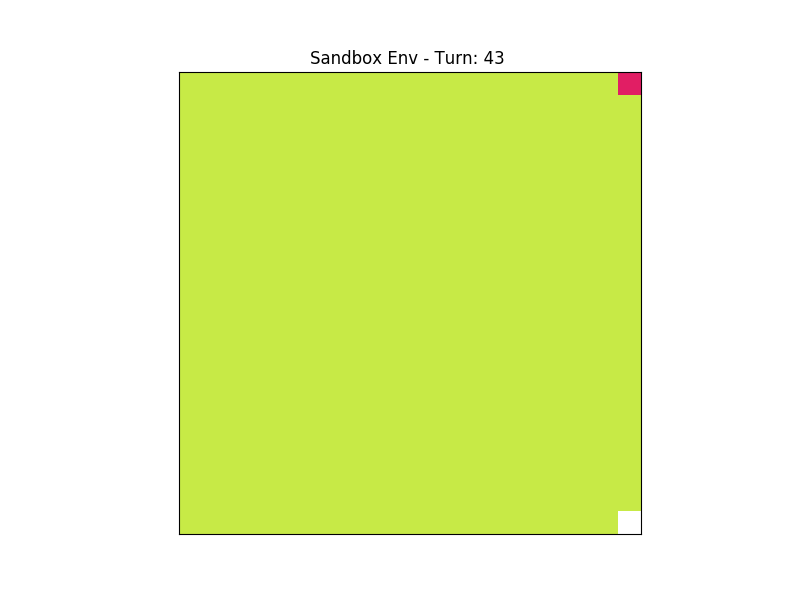

KeyboardInterrupt: 

In [76]:
%matplotlib notebook
utils.render(actor_TD, x=20, y=20, goal=[19,19])